Classification Model Project Part 2: Feature Selection & Data Splitting

Loading Given Dataset:

In [196]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer


df = pd.read_csv('Churn_Modelling.csv')
df

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Our target variable is the 'Exited' column since we are trying to determine the number of customers who will cancel their subscriptions compared to the, hopefully higher, number of new customers (aka determine the churn rate).

Let's first explore the relationships between 
CreditScore and Avg. Age, 
Gender and churn rate,
Geography and churn rate

In [197]:
df.groupby("CreditScore").agg({"Age": "mean"})

,Age
CreditScore,
350,48.800000
351,57.000000
358,52.000000
359,44.000000
363,28.000000
...,...
846,42.200000
847,43.500000
848,33.600000


In [198]:
df.groupby("Gender").agg({"Exited": "mean"})

,Exited
Gender,
Female,0.250715
Male,0.164559


In [199]:
df.groupby("Geography").agg({"Exited": "mean"})

,Exited
Geography,
France,0.161548
Germany,0.324432
Spain,0.166734


CreditScore and Avg. Age give us a much larger range of data since there is such a large range of possible credit scores compared to the 2 other comparisons that compared with Avg. Churn Rate.

Let's explore the relationship between Gender and churn rate instead.

In [200]:
df.groupby("Gender").agg({"Age": "mean"})

,Age
Gender,
Female,39.238389
Male,38.658237


Let's check if the avg tenure length has any correlation between customers who stayed or exited.

In [201]:
df.groupby(["Gender", "Exited"]).agg({"Tenure" : "mean"})

Tenure
Gender Exited          
Female 0       4.977086
       1       4.933275
Male   0       5.075236
       1       4.932071

Let's look at a visual comparison of the amount of customers that have stayed vs those who have exited. About 20% of the original 1000 customers have cancelled their subscription service.

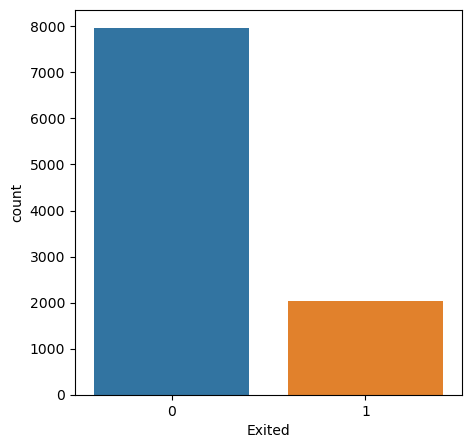

In [202]:
%matplotlib inline

plt.figure(figsize=(5,5))
sns.countplot(x='Exited', data=df)
plt.show()

Let's take a closer look at how churn rate can be further broken down.

In [203]:
#fig, axarr = plt.subplots(2, 2, figsize=(20, 12))

#sns.countplot(x='Geography', hue='Exited', data=df, ax=axarr[0][0])
#sns.countplot(x='Gender', hue='Exited', data=df, ax=axarr[0][1])
#sns.countplot(x='HasCrCard', hue='Exited', data=df, ax=axarr[1][0])
#sns.countplot(x='IsActiveMember', hue='Exited', data=df, ax=axarr[1][1])

#plt.show()

Let's develop a heatmap analysis, using only the numerical values of the dataset. 

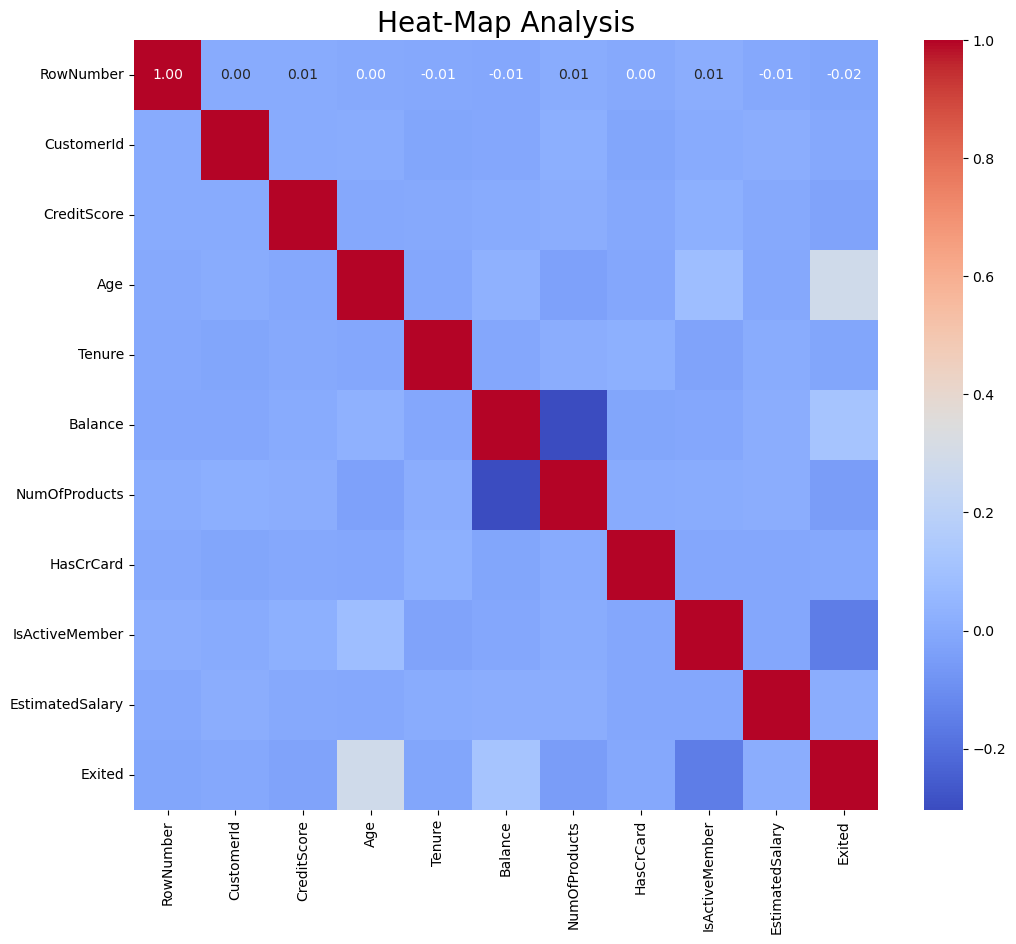

In [204]:
f, ax = plt.subplots(figsize= [12,10])
sns.heatmap(df.corr(numeric_only=True), annot=True, fmt=".2f", ax=ax, cmap = "coolwarm" )
ax.set_title("Heat-Map Analysis", fontsize=20)
plt.show()

Now we can being to split the data into a training set and testing set.

In [205]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

# Convert nominal categorical variables to dummy/indicator variables
#df = pd.get_dummies(df, columns=['Geography'])

# Assuming 'Exited' is the target variable
X = df.drop('Exited', axis=1)  # Features (all the columns except for the target variable)
y = df['Exited']  # Target variable

# Split the data into a training set and a testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes to confirm the split
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('feature_selection', SelectKBest(f_classif, k=5)),  # Select top 10 features
    ('classifier', LogisticRegression())
])

# Fit the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict and evaluate on the test set
y_pred = pipeline.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy}")

Training set shape: (8000, 13)
Test set shape: (2000, 13)


NameError: name 'preprocessor' is not defined